In [33]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import json
import requests

In [14]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [15]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [17]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

634

In [18]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


In [19]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e99e4875a6b849c43b245f3ff50fcaf


In [20]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [21]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [22]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities. This code includes a try-except block
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | pangnirtung
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | khatanga
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | talara
Processing Record 7 of Set 1 | upernavik
Processing Record 8 of Set 1 | szilvasvarad
Processing Record 9 of Set 1 | labuhan
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | luderitz
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | cherskiy
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | paita
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | barrow
Processing Record 22 of Set 1 | hargeysa
Processing Record 23 of Set 1 | isangel
P

Processing Record 40 of Set 4 | butaritari
Processing Record 41 of Set 4 | quibor
Processing Record 42 of Set 4 | anshun
Processing Record 43 of Set 4 | cabo san lucas
Processing Record 44 of Set 4 | port macquarie
Processing Record 45 of Set 4 | ciudad bolivar
Processing Record 46 of Set 4 | nikel
Processing Record 47 of Set 4 | bintulu
Processing Record 48 of Set 4 | kasongo-lunda
Processing Record 49 of Set 4 | georgetown
Processing Record 50 of Set 4 | ancud
Processing Record 1 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 2 of Set 5 | victoria
Processing Record 3 of Set 5 | lompoc
Processing Record 4 of Set 5 | tazovskiy
Processing Record 5 of Set 5 | padang
Processing Record 6 of Set 5 | olafsvik
Processing Record 7 of Set 5 | basoko
Processing Record 8 of Set 5 | roald
Processing Record 9 of Set 5 | comarapa
Processing Record 10 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 11 of Set 5 | norman wells
Processing Record 12 of Set 5 

Processing Record 30 of Set 8 | sawtell
Processing Record 31 of Set 8 | coolum beach
Processing Record 32 of Set 8 | biloela
Processing Record 33 of Set 8 | chatrapur
Processing Record 34 of Set 8 | la reforma
Processing Record 35 of Set 8 | sheridan
Processing Record 36 of Set 8 | saint-augustin
Processing Record 37 of Set 8 | novyy urengoy
Processing Record 38 of Set 8 | tuatapere
Processing Record 39 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 40 of Set 8 | ponta delgada
Processing Record 41 of Set 8 | bambanglipuro
Processing Record 42 of Set 8 | sao lourenco do sul
Processing Record 43 of Set 8 | karauzyak
City not found. Skipping...
Processing Record 44 of Set 8 | luena
Processing Record 45 of Set 8 | mwanza
Processing Record 46 of Set 8 | palmer
Processing Record 47 of Set 8 | rocha
Processing Record 48 of Set 8 | dunedin
Processing Record 49 of Set 8 | arica
Processing Record 50 of Set 8 | along
Processing Record 1 of Set 9 | guerrero negro
Processing Rec

Processing Record 12 of Set 12 | raton
Processing Record 13 of Set 12 | belmonte
Processing Record 14 of Set 12 | sitka
Processing Record 15 of Set 12 | solnechnyy
Processing Record 16 of Set 12 | rotterdam
Processing Record 17 of Set 12 | ninghai
Processing Record 18 of Set 12 | port augusta
Processing Record 19 of Set 12 | tamandare
Processing Record 20 of Set 12 | tullahoma
Processing Record 21 of Set 12 | juneau
Processing Record 22 of Set 12 | vokhtoga
Processing Record 23 of Set 12 | severnoye
Processing Record 24 of Set 12 | rumford
Processing Record 25 of Set 12 | presidencia roque saenz pena
Processing Record 26 of Set 12 | yialos
City not found. Skipping...
Processing Record 27 of Set 12 | hofn
Processing Record 28 of Set 12 | kananga
Processing Record 29 of Set 12 | shetpe
Processing Record 30 of Set 12 | kolosovka
Processing Record 31 of Set 12 | faya
Processing Record 32 of Set 12 | bowling green
Processing Record 33 of Set 12 | talcahuano
Processing Record 34 of Set 12 | 

In [23]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,80.58,67,80,5.99,US,2022-12-10 21:59:55
1,Pangnirtung,66.1451,-65.7125,5.65,98,100,1.66,CA,2022-12-10 21:59:55
2,Bredasdorp,-34.5322,20.0403,66.54,87,100,16.08,ZA,2022-12-10 21:59:56
3,Khatanga,71.9667,102.5000,-8.09,96,100,11.74,RU,2022-12-10 21:59:56
4,New Norfolk,-42.7826,147.0587,60.93,55,99,4.00,AU,2022-12-10 21:59:56
5,Talara,-4.5772,-81.2719,77.76,61,0,14.97,PE,2022-12-10 21:59:56
6,Upernavik,72.7868,-56.1549,22.08,94,100,12.68,GL,2022-12-10 21:59:57
7,Szilvasvarad,48.1000,20.4000,35.08,94,100,6.38,HU,2022-12-10 21:59:57
8,Labuhan,-6.8844,112.2051,76.77,85,99,7.47,ID,2022-12-10 21:59:57
9,Yellowknife,62.4560,-114.3525,-1.68,84,100,4.61,CA,2022-12-10 21:59:58


In [24]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2022-12-10 21:59:55,22.0752,-159.3190,80.58,67,80,5.99
1,Pangnirtung,CA,2022-12-10 21:59:55,66.1451,-65.7125,5.65,98,100,1.66
2,Bredasdorp,ZA,2022-12-10 21:59:56,-34.5322,20.0403,66.54,87,100,16.08
3,Khatanga,RU,2022-12-10 21:59:56,71.9667,102.5000,-8.09,96,100,11.74
4,New Norfolk,AU,2022-12-10 21:59:56,-42.7826,147.0587,60.93,55,99,4.00
5,Talara,PE,2022-12-10 21:59:56,-4.5772,-81.2719,77.76,61,0,14.97
6,Upernavik,GL,2022-12-10 21:59:57,72.7868,-56.1549,22.08,94,100,12.68
7,Szilvasvarad,HU,2022-12-10 21:59:57,48.1000,20.4000,35.08,94,100,6.38
8,Labuhan,ID,2022-12-10 21:59:57,-6.8844,112.2051,76.77,85,99,7.47
9,Yellowknife,CA,2022-12-10 21:59:58,62.4560,-114.3525,-1.68,84,100,4.61


In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [28]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1670711052.3624332

In [44]:
city_data_df.isnull().sum()

City          0
Country       0
Date          0
Lat           0
Lng           0
Max Temp      0
Humidity      0
Cloudiness    0
Wind Speed    0
dtype: int64

In [55]:
city_data_df.dtypes

City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

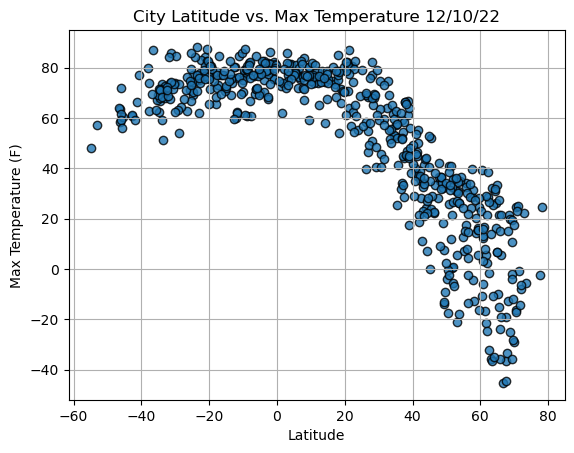

In [56]:
#6.3.1 this creates a scatter plot
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(city_data_df["Lat"],
            city_data_df["Max Temp"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

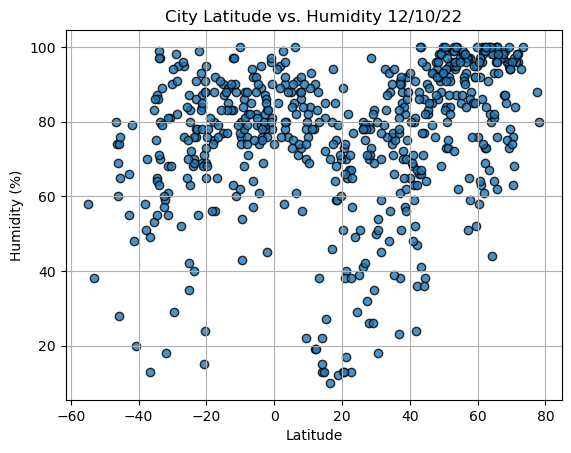

In [57]:
#6.3.2
# Build the scatter plots for latitude vs. humidity.
plt.scatter(city_data_df["Lat"],
            city_data_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

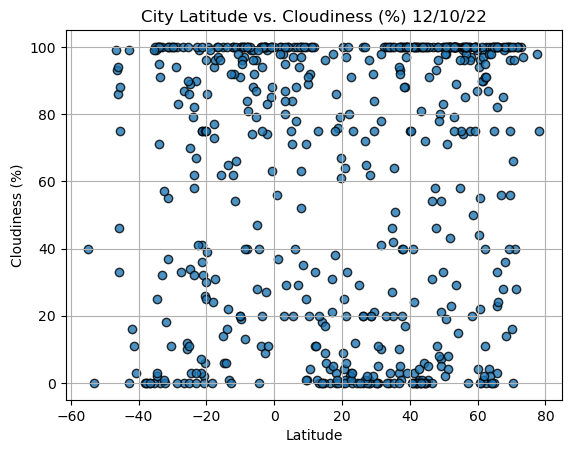

In [58]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(city_data_df["Lat"],
            city_data_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

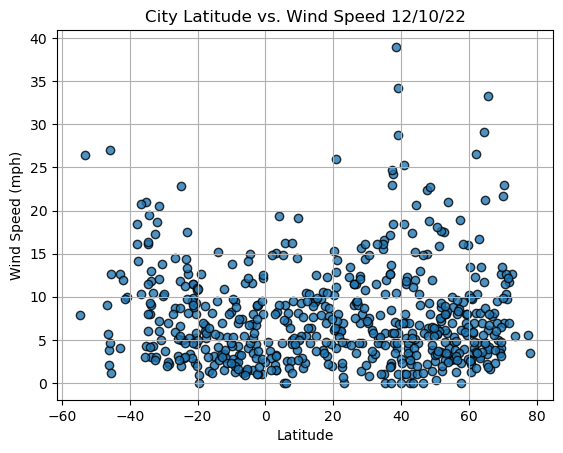

In [59]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(city_data_df["Lat"],
            city_data_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()